In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"./data/data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   avg_bill_methods          1000 non-null   object 
 2   debtor_volume_handled     1000 non-null   int64  
 3   bill_amount_collected     1000 non-null   int64  
 4   total_actual              1000 non-null   int64  
 5   total_cost                1000 non-null   int64  
 6   success_rate              1000 non-null   float64
 7   time_to_collect           1000 non-null   int64  
 8   collector_gender          1000 non-null   object 
 9   collector_marital_status  1000 non-null   object 
 10  collector_age             1000 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 86.1+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,time_to_collect,collector_gender,collector_marital_status,collector_age
0,sms or WA,6,33900000,42000000,69798,81.0,4,laki-laki,Menikah,45.0
1,sms or WA,5,29500000,48400000,28720,61.0,3,perempuan,Cerai mati,32.0
2,sms or WA,2,8200000,13800000,24659,59.0,0,laki-laki,Cerai hidup,62.0
3,sms or WA,12,11700000,23000000,69469,51.0,0,perempuan,Cerai mati,55.0
4,sms or WA,15,13300000,19500000,149329,68.0,0,perempuan,Menikah,53.0


In [5]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual"]])
df2[["bill_amount_collected", "total_actual"]] = scaler.transform(df[["bill_amount_collected", "total_actual"]])
df2[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]] = df[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]]
y = df["total_cost"]

df2.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,avg_bill_methods,collector_gender,collector_marital_status,bill_amount_collected,total_actual,time_to_collect,debtor_volume_handled,collector_age,success_rate
0,0,0,3,0.516511,0.048904,4,6,45.0,81.0
1,0,1,2,0.367485,0.156830,3,5,32.0,61.0
2,0,0,1,-0.353937,-0.426644,0,2,62.0,59.0
3,0,1,2,-0.235394,-0.271501,0,12,55.0,51.0
4,0,1,3,-0.181202,-0.330523,0,15,53.0,68.0


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((800, 9), (200, 9), (800,), (800,))

In [7]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 378122101.84
      Mean Absolute Error : 15535.19
      Mean Absolute Percentage Error : 0.26
      Root Mean Squared Error : 0.26
      R_Squared : 0.80
      


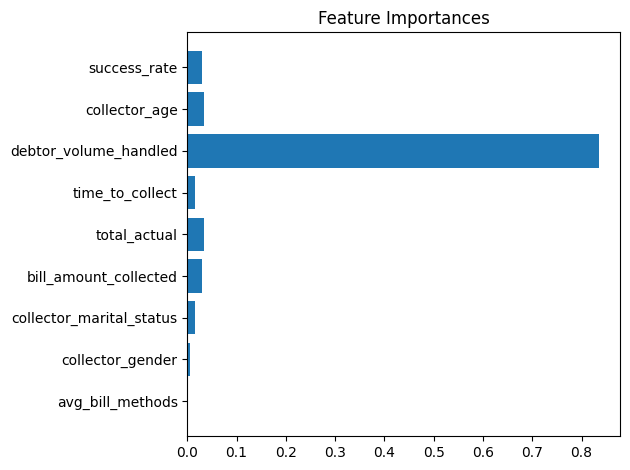

In [9]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [10]:
# Tentukan hyperparameter yang akan dijelajahi
param_grid = {
    'n_estimators': np.arange(100, 301, 10),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Inisiasi Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Inisiasi Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2268 candidates, totalling 11340 fits


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5670 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3165 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\si

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300])},
             verbose=2)

In [11]:
grid_search.best_score_

0.8073706083159683

In [12]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 362938642.10
      Mean Absolute Error : 15392.86
      Mean Absolute Percentage Error : 0.29
      Root Mean Squared Error : 0.29
      R_Squared : 0.81
      


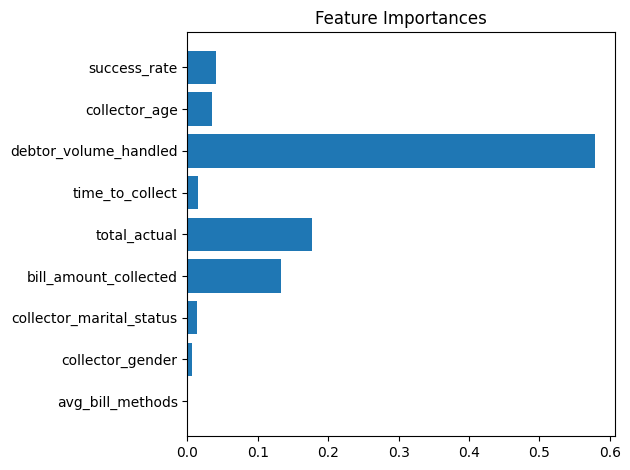

In [13]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [14]:
import pickle

pickle.dump(model, open("random_forest.pkl", "wb"))

In [15]:
import joblib

load_model = joblib.load('random_forest.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


37248.306575359515

In [16]:
y_test.iloc[-1]

29495